In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Carga los datos limpios
df = pd.read_csv("C:/Users/JUAN/Desktop/BOOTCAMP - DATA SCIENCE/Ejercicios Juan/HotelPricePredictor_proyecto_final_ML/data/processed/hotel_reservations_clean.csv")
df.head()


,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled,total_guests,total_nights
0,0,224,2017,10,2,0,0,0,65.00,0,...,False,False,False,False,False,True,False,True,2,3
1,0,5,2018,11,6,0,0,0,106.68,1,...,False,False,False,False,False,False,True,True,2,5
2,0,1,2018,2,28,0,0,0,60.00,0,...,False,False,False,False,False,False,True,False,1,3
3,0,211,2018,5,20,0,0,0,100.00,0,...,False,False,False,False,False,False,True,False,2,2
4,0,48,2018,4,11,0,0,0,94.50,0,...,False,False,False,False,False,False,True,False,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34579 entries, 0 to 34578
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   required_car_parking_space            34579 non-null  int64  
 1   lead_time                             34579 non-null  int64  
 2   arrival_year                          34579 non-null  int64  
 3   arrival_month                         34579 non-null  int64  
 4   arrival_date                          34579 non-null  int64  
 5   repeated_guest                        34579 non-null  int64  
 6   no_of_previous_cancellations          34579 non-null  int64  
 7   no_of_previous_bookings_not_canceled  34579 non-null  int64  
 8   avg_price_per_room                    34579 non-null  float64
 9   no_of_special_requests                34579 non-null  int64  
 10  type_of_meal_plan_Meal Plan 2         34579 non-null  bool   
 11  type_of_meal_pl

###  Modelado


#### Preparación de los Datos

Generando csv con train y test

In [5]:
# Separar X e y
X = df.drop(columns=['avg_price_per_room'])
y = df['avg_price_per_room']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # El random_state asegura reproducibilidad

# Escalar las características con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train_scaled

array([[-0.17323625,  2.14913652,  0.46632011, ..., -1.4245132 ,
         0.13110593, -0.02230469],
       [-0.17323625, -0.13072354,  0.46632011, ..., -1.4245132 ,
        -1.53868383, -1.14313037],
       [-0.17323625,  2.72778121,  0.46632011, ..., -1.4245132 ,
         0.13110593,  0.53810815],
       ...,
       [-0.17323625, -0.67464954,  0.46632011, ...,  0.7019942 ,
         0.13110593, -1.14313037],
       [-0.17323625, -0.08443196,  0.46632011, ..., -1.4245132 ,
         0.13110593, -0.58271753],
       [-0.17323625,  0.08916144,  0.46632011, ...,  0.7019942 ,
         0.13110593,  2.21934667]], shape=(27663, 24))

In [7]:
# Combinar X_train e y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Combinar X_test e y_test
test_data = pd.concat([X_test, y_test], axis=1)

In [8]:
train_data.to_csv(r'C:/Users/JUAN/Desktop/BOOTCAMP - DATA SCIENCE/Ejercicios Juan/HotelPricePredictor_proyecto_final_ML/data/train/hotel_reservations_train_data.csv', index=False)
test_data.to_csv(r'C:/Users/JUAN/Desktop/BOOTCAMP - DATA SCIENCE/Ejercicios Juan/HotelPricePredictor_proyecto_final_ML/data/test/hotel_reservations_test_data.csv', index=False)


#### Selección y Entrenamiento de Modelos

In [9]:
# Modelo
forest_model = RandomForestRegressor(random_state=42)

# Entrenamiento
forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

#### Evaluación de Modelos

In [10]:
# Predicciones
forest_pred = forest_model.predict(X_test_scaled)

# Evaluación

print("\n--- Random Forest ---")
print("MSE:", mean_squared_error(y_test, forest_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, forest_pred)))
print("MAE:", mean_absolute_error(y_test, forest_pred))
print("R²:", r2_score(y_test, forest_pred))


--- Random Forest ---
MSE: 121.797230272095
RMSE: 11.036178245755865
MAE: 6.396035211077084
R²: 0.8361409324557122


Conclusiones:

Modelo: Random Forest rendimiento general: Tiene el R² más alto (0.84), lo que indica que explica una gran proporción de la varianza en el precio de las habitaciones. También tiene el RMSE y el MAE más bajos, lo que significa que tiene los errores de predicción más pequeños.



#### Análisis y Evaluación de Resultados

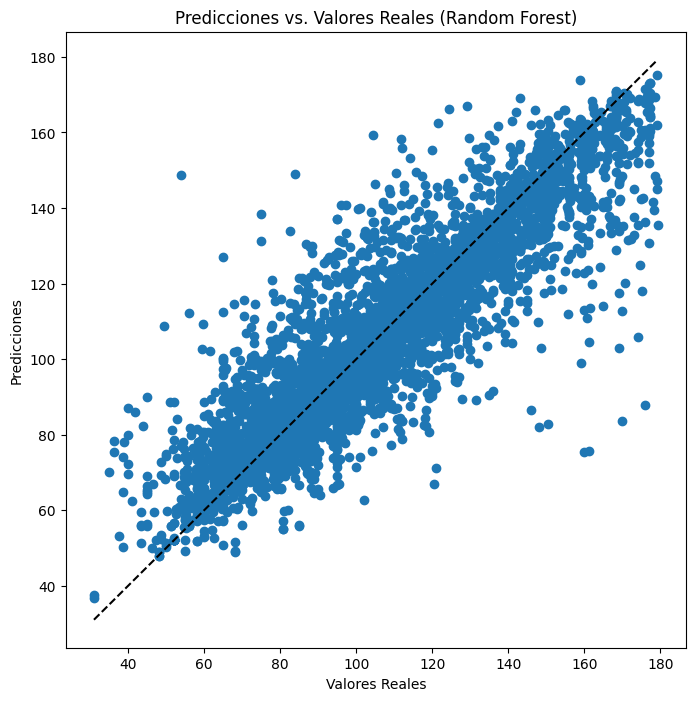

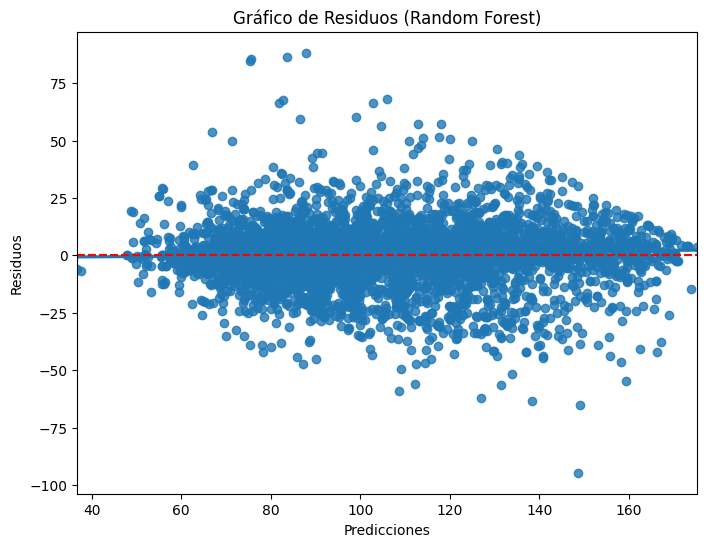

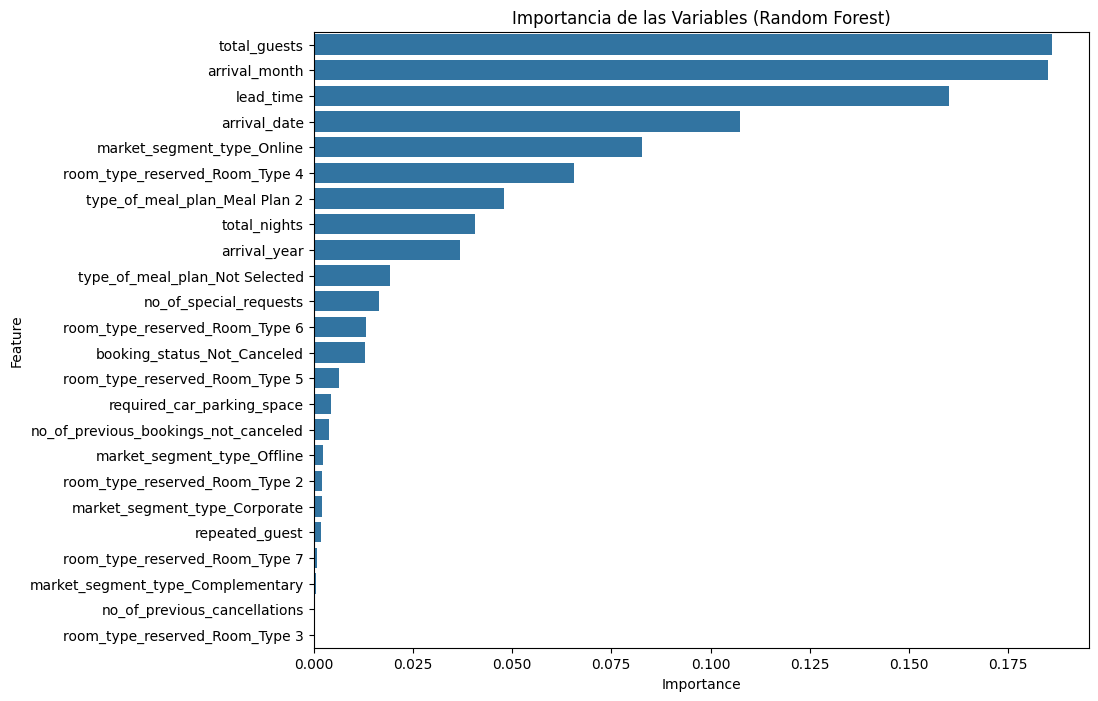

In [11]:
# forest_model fue el mejor

# Gráfico de Predicciones vs. Valores Reales
plt.figure(figsize=(8, 8))
plt.scatter(y_test, forest_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Random Forest)')
plt.show()

# Análisis de Residuos
residuals = y_test - forest_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=forest_pred, y=residuals, lowess=True)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos (Random Forest)')
plt.axhline(y=0, color='r', linestyle='--')  # Línea de referencia en y=0
plt.show()

# Importancia de las Variables (solo para modelos como Random Forest)
if isinstance(forest_model, RandomForestRegressor):
    importances = forest_model.feature_importances_
    feature_names = X_train.columns
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title('Importancia de las Variables (Random Forest)')
    plt.show()

In [14]:
import pickle

# Guardar el modelo ajustado por GridSearchCV
with open(r'C:\Users\JUAN\Desktop\BOOTCAMP - DATA SCIENCE\Ejercicios Juan\HotelPricePredictor_proyecto_final_ML\models\trained_model_1.pkl', 'wb') as file:
    pickle.dump(forest_model, file)

# Guardar el scaler
with open(r'C:\Users\JUAN\Desktop\BOOTCAMP - DATA SCIENCE\Ejercicios Juan\HotelPricePredictor_proyecto_final_ML\models\scaler_trained_model_1.pkl', 'wb') as file:
    pickle.dump(scaler, file)

"Resumen del Proceso de Predicción de Precios de Hotel

Este proyecto se ha desarrollado en varias etapas, cada una con un propósito específico:

Obtención de Datos: Se descargó el dataset 'Hotel Reservations.csv' desde Kaggle utilizando la librería kagglehub.
Limpieza y Análisis Exploratorio (EDA): Se realizó una limpieza exhaustiva de los datos, incluyendo el manejo de valores faltantes, la eliminación de columnas irrelevantes y la codificación de variables categóricas. Además, se llevó a cabo un análisis exploratorio para entender las distribuciones de las variables y las relaciones entre ellas.
Ingeniería de Características: Se crearon nuevas características (como 'total_guests' y 'total_nights') para mejorar la capacidad predictiva del modelo.
Entrenamiento del Modelo: Se entrenó un modelo de Random Forest para predecir los precios de las habitaciones de hotel. Se utilizó la técnica de validación cruzada (GridSearchCV) para ajustar los hiperparámetros del modelo y optimizar su rendimiento.
Evaluación del Modelo: Se evaluó el rendimiento del modelo utilizando métricas como el RMSE (Root Mean Squared Error), MAE (Mean Absolute Error) y R² (R-cuadrado).
Persistencia del Modelo: Finalmente, se guardó el modelo entrenado y el objeto scaler para su uso en futuras predicciones.
Este proceso garantiza que los datos estén limpios y preparados para el modelado, y que el modelo de predicción sea robusto y preciso."

In [13]:
df.columns


Index(['required_car_parking_space', 'lead_time', 'arrival_year',
       'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Not_Canceled', 'total_guests', 'total_nights'],
      dtype='object')